In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#so i can see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#got the table from https://nces.ed.gov/ccd/elsi/tableGenerator.aspx?savedTableID=357854
#need to click a bunch of check boxes and the interface can only handle a few years at a time
#then exported as a csv once it had generated the table I needed
#the csv version of the table brings in lines that the begining that throw everything off so you have to cut the first 6
#there is a footer that isn't necessary, but also doesn't really hurt anything, so I removed it as well (7 lines total)

df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-2-2f659cf8e807>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export.csv', skiprows= range(0,6),skipfooter=7)


In [3]:
df_dropout=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_dropout_rate.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-3-0fe670f607af>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_dropout=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_dropout_rate.csv', skiprows= range(0,6),skipfooter=7)


In [4]:
#merged original df with the one with dropout info and then assigned it back to the original df.
df=df.merge(df_dropout, how='outer', on='Agency ID - NCES Assigned [District] Latest available year')

In [5]:
#replaced all the symbols in the df to 0s so that I can change these columns into intergers since they are currently objects
df=df.replace(['†','–','="0"','‡','="0.90"','="0.70"','="0.50"','="0.00"','="0.40"','="0.60"','="0.80"','="0.10"','="0.20"','="0.30"'],'0')

In [6]:
the_list=df.columns
print(the_list[0:101])

Index(['Agency Name_x', 'State Name [District] Latest available year_x',
       'State Abbr [District] Latest available year',
       'Agency ID - NCES Assigned [District] Latest available year',
       'State Name [District] 2009-10', 'State Name [District] 2008-09',
       'State Name [District] 2007-08', 'State Name [District] 2006-07',
       'State Name [District] 2005-06', 'Agency Name [District] 2009-10',
       ...
       'Diploma Recipients (**) [District] 2009-10',
       'Diploma Recipients (**) [District] 2008-09',
       'Diploma Recipients (**) [District] 2007-08',
       'Diploma Recipients (**) [District] 2006-07',
       'Diploma Recipients (**) [District] 2005-06',
       'Averaged Freshman Graduation Rate [District] 2009-10',
       'Averaged Freshman Graduation Rate [District] 2008-09',
       'Averaged Freshman Graduation Rate [District] 2007-08',
       'Averaged Freshman Graduation Rate [District] 2006-07',
       'Averaged Freshman Graduation Rate [District] 200

use other notebooks to assign these new names to the columns

In [7]:
df.columns=['Agency Name', 'State Name Latest available year',
       'State Abbr Latest available year',
       'Agency ID - NCES Assigned Latest available year',
       'State Name 2009-10', 'State Name 2008-09',
       'State Name 2007-08', 'State Name 2006-07',
       'State Name 2005-06', 'Agency Name 2009-10',
       'Agency Name 2008-09', 'Agency Name 2007-08',
       'Agency Name 2006-07', 'Agency Name 2005-06',
       'County Name 2009-10', 'County Name 2008-09',
       'County Name 2007-08', 'County Name 2006-07',
       'County Name 2005-06', 'County Number 2009-10',
       'County Number 2008-09', 'County Number 2007-08',
       'County Number 2006-07', 'County Number 2005-06',
       'Total Number Operational Schools 2009-10',
       'Total Number Operational Schools 2008-09',
       'Total Number Operational Schools 2007-08',
       'Total Number Operational Schools 2006-07',
       'Total Number Operational Schools 2005-06',
       'Location ZIP 2009-10', 'Location ZIP 2008-09',
       'Location ZIP 2007-08', 'Location ZIP 2006-07',
       'Location ZIP 2005-06',
       'Grades 9-12 Students 2009-10',
       'Grades 9-12 Students 2008-09',
       'Grades 9-12 Students 2007-08',
       'Grades 9-12 Students 2006-07',
       'Grades 9-12 Students 2005-06',
       'Fall Membership 2009-10',
       'Fall Membership 2008-09',
       'Fall Membership 2007-08',
       'Fall Membership 2006-07',
       'Fall Membership 2005-06',
       'Total General Revenue 2009-10',
       'Total General Revenue 2008-09',
       'Total General Revenue 2007-08',
       'Total General Revenue 2006-07',
       'Total General Revenue 2005-06',
       'Total Current Expenditures - El-Sec Education 2009-10',
       'Total Current Expenditures - El-Sec Education 2008-09',
       'Total Current Expenditures - El-Sec Education 2007-08',
       'Total Current Expenditures - El-Sec Education 2006-07',
       'Total Current Expenditures - El-Sec Education 2005-06',
       'Total Expenditures 2009-10',
       'Total Expenditures 2008-09',
       'Total Expenditures 2007-08',
       'Total Expenditures 2006-07',
       'Total Expenditures 2005-06',
       'Total Revenue per Pupil 2009-10',
       'Total Revenue per Pupil 2008-09',
       'Total Revenue per Pupil 2007-08',
       'Total Revenue per Pupil 2006-07',
       'Total Revenue per Pupil 2005-06',
       'Total Current Expenditures - Instruction per Pupil 2009-10',
       'Total Current Expenditures - Instruction per Pupil 2008-09',
       'Total Current Expenditures - Instruction per Pupil 2007-08',
       'Total Current Expenditures - Instruction per Pupil 2006-07',
       'Total Current Expenditures - Instruction per Pupil 2005-06',
       'Total Expenditures per Pupil 2009-10',
       'Total Expenditures per Pupil 2008-09',
       'Total Expenditures per Pupil 2007-08',
       'Total Expenditures per Pupil 2006-07',
       'Total Expenditures per Pupil 2005-06',
       'Total Students All Grades 2009-10',
       'Total Students All Grades 2008-09',
       'Total Students All Grades 2007-08',
       'Total Students All Grades 2006-07',
       'Total Students All Grades 2005-06',
       'Location City 2009-10', 'Location City 2008-09',
       'Location City 2007-08', 'Location City 2006-07',
       'Location City 2005-06', 'Agency Name_y',
       'State Name Latest available year_y',
       'Total Dropout Rate in Percent - 9-12th grade 2009-10',
       'Total Dropout Rate in Percent - 9-12th grade 2008-09',
       'Total Dropout Rate in Percent - 9-12th grade 2007-08',
       'Total Dropout Rate in Percent - 9-12th grade 2006-07',
       'Total Dropout Rate in Percent - 9-12th grade 2005-06',
       'Diploma Recipients 2009-10',
       'Diploma Recipients 2008-09',
       'Diploma Recipients 2007-08',
       'Diploma Recipients 2006-07',
       'Diploma Recipients 2005-06',
       'Averaged Freshman Graduation Rate 2009-10',
       'Averaged Freshman Graduation Rate 2008-09',
       'Averaged Freshman Graduation Rate 2007-08',
       'Averaged Freshman Graduation Rate 2006-07',
       'Averaged Freshman Graduation Rate 2005-06']

In [8]:
#changing the columns below into intergers from objects so that calculations and visualizations can be done. 
df[[  'Total Number Operational Schools 2009-10',
   'Total Number Operational Schools 2008-09',
   'Total Number Operational Schools 2007-08',
   'Total Number Operational Schools 2006-07',
   'Total Number Operational Schools 2005-06',
   'Grades 9-12 Students 2009-10',
   'Grades 9-12 Students 2008-09',
   'Grades 9-12 Students 2007-08',
   'Grades 9-12 Students 2006-07',
   'Grades 9-12 Students 2005-06',
   'Fall Membership 2009-10',
   'Fall Membership 2008-09',
   'Fall Membership 2007-08',
   'Fall Membership 2006-07',
   'Fall Membership 2005-06',
   'Total General Revenue 2009-10',
   'Total General Revenue 2008-09',
   'Total General Revenue 2007-08',
   'Total General Revenue 2006-07',
   'Total General Revenue 2005-06',
   'Total Current Expenditures - El-Sec Education 2009-10',
   'Total Current Expenditures - El-Sec Education 2008-09',
   'Total Current Expenditures - El-Sec Education 2007-08',
   'Total Current Expenditures - El-Sec Education 2006-07',
   'Total Current Expenditures - El-Sec Education 2005-06',
   'Total Expenditures 2009-10',
   'Total Expenditures 2008-09',
   'Total Expenditures 2007-08',
   'Total Expenditures 2006-07',
   'Total Expenditures 2005-06',
   'Total Revenue per Pupil 2009-10',
   'Total Revenue per Pupil 2008-09',
   'Total Revenue per Pupil 2007-08',
   'Total Revenue per Pupil 2006-07',
   'Total Revenue per Pupil 2005-06',
   'Total Current Expenditures - Instruction per Pupil 2009-10',
   'Total Current Expenditures - Instruction per Pupil 2008-09',
   'Total Current Expenditures - Instruction per Pupil 2007-08',
   'Total Current Expenditures - Instruction per Pupil 2006-07',
   'Total Current Expenditures - Instruction per Pupil 2005-06',
   'Total Expenditures per Pupil 2009-10',
   'Total Expenditures per Pupil 2008-09',
   'Total Expenditures per Pupil 2007-08',
   'Total Expenditures per Pupil 2006-07',
   'Total Expenditures per Pupil 2005-06',
   'Total Students All Grades 2009-10',
   'Total Students All Grades 2008-09',
   'Total Students All Grades 2007-08',
   'Total Students All Grades 2006-07',
   'Total Students All Grades 2005-06'
  ]]=df[[  'Total Number Operational Schools 2009-10',
   'Total Number Operational Schools 2008-09',
   'Total Number Operational Schools 2007-08',
   'Total Number Operational Schools 2006-07',
   'Total Number Operational Schools 2005-06',
   'Grades 9-12 Students 2009-10',
   'Grades 9-12 Students 2008-09',
   'Grades 9-12 Students 2007-08',
   'Grades 9-12 Students 2006-07',
   'Grades 9-12 Students 2005-06',
   'Fall Membership 2009-10',
   'Fall Membership 2008-09',
   'Fall Membership 2007-08',
   'Fall Membership 2006-07',
   'Fall Membership 2005-06',
   'Total General Revenue 2009-10',
   'Total General Revenue 2008-09',
   'Total General Revenue 2007-08',
   'Total General Revenue 2006-07',
   'Total General Revenue 2005-06',
   'Total Current Expenditures - El-Sec Education 2009-10',
   'Total Current Expenditures - El-Sec Education 2008-09',
   'Total Current Expenditures - El-Sec Education 2007-08',
   'Total Current Expenditures - El-Sec Education 2006-07',
   'Total Current Expenditures - El-Sec Education 2005-06',
   'Total Expenditures 2009-10',
   'Total Expenditures 2008-09',
   'Total Expenditures 2007-08',
   'Total Expenditures 2006-07',
   'Total Expenditures 2005-06',
   'Total Revenue per Pupil 2009-10',
   'Total Revenue per Pupil 2008-09',
   'Total Revenue per Pupil 2007-08',
   'Total Revenue per Pupil 2006-07',
   'Total Revenue per Pupil 2005-06',
   'Total Current Expenditures - Instruction per Pupil 2009-10',
   'Total Current Expenditures - Instruction per Pupil 2008-09',
   'Total Current Expenditures - Instruction per Pupil 2007-08',
   'Total Current Expenditures - Instruction per Pupil 2006-07',
   'Total Current Expenditures - Instruction per Pupil 2005-06',
   'Total Expenditures per Pupil 2009-10',
   'Total Expenditures per Pupil 2008-09',
   'Total Expenditures per Pupil 2007-08',
   'Total Expenditures per Pupil 2006-07',
   'Total Expenditures per Pupil 2005-06',
   'Total Students All Grades 2009-10',
   'Total Students All Grades 2008-09',
   'Total Students All Grades 2007-08',
   'Total Students All Grades 2006-07',
   'Total Students All Grades 2005-06'
  ]].astype('float')

In [9]:
#the dropout rate information wasn't in the right format, it was still objects instead of floats
df[['Total Dropout Rate in Percent - 9-12th grade 2009-10',
   'Total Dropout Rate in Percent - 9-12th grade 2008-09',
   'Total Dropout Rate in Percent - 9-12th grade 2007-08',
   'Total Dropout Rate in Percent - 9-12th grade 2006-07',
   'Total Dropout Rate in Percent - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']]=df[[
   'Total Dropout Rate in Percent - 9-12th grade 2009-10',
   'Total Dropout Rate in Percent - 9-12th grade 2008-09',
   'Total Dropout Rate in Percent - 9-12th grade 2007-08',
   'Total Dropout Rate in Percent - 9-12th grade 2006-07',
   'Total Dropout Rate in Percent - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']].astype('float')

In [10]:
#using describe to get aggregate data on data set
#allows me to replace zeroes with Nans so that mean isn't counting missing values as 0
###df = df.replace(0, np.NaN)
#assigned the mean to a specific index number at the very end
###df.loc[18958]=df.mean()
# because there is no such thing as the mean of a string, the 'Agency Name' comes back as a Nan, so this gives it a name so
# that I can call on it later
###df['Agency Name']= df['Agency Name'].fillna("NATIONAL AVERAGE")
###df

Planning on getting at least 3 schools that are year round and comparing their dropout rate and freshman grad rate with the average of those districts that surround them.  Will do the same with the cost per student and pay look at current and longterm cost as well.  Would Ideally be able to automate so that I don't have to look on a map for each school.  If I can then I could scale up to more year round schools for a more comprehensive look.  Ideally would like to automate determining schools that are year round from those that aren't so that can be scaled easily too.

Would also be nice to look at the before and after for 5 years for schools that made the transition from normal to year round. A look at schools that went the other way would be nice as well.

These two methods would allow me to compare places against themselves and against others

In [11]:
#pulling out the schools that are surrounding socorro, the school i'm interested in, district number is more helpful than city here
# also resetting the index 
#also adding in the national average
bardstown_df=df[(df['County Number 2009-10']=='21179')| (df['County Number 2009-10']=='21229')| (df['County Number 2009-10']=='21155')| (df['County Number 2009-10']=='21123')| (df['County Number 2009-10']=='21005')| (df['County Number 2009-10']=='21215')| (df['County Number 2009-10']=='21029')| (df['County Number 2009-10']=='21093')| (df['Agency Name']=='NATIONAL AVERAGE')].reset_index(drop=True)
bardstown_df

,Agency Name,State Name Latest available year,State Abbr Latest available year,Agency ID - NCES Assigned Latest available year,State Name 2009-10,State Name 2008-09,State Name 2007-08,State Name 2006-07,State Name 2005-06,Agency Name 2009-10,Agency Name 2008-09,Agency Name 2007-08,Agency Name 2006-07,Agency Name 2005-06,County Name 2009-10,County Name 2008-09,County Name 2007-08,County Name 2006-07,County Name 2005-06,County Number 2009-10,County Number 2008-09,County Number 2007-08,County Number 2006-07,County Number 2005-06,Total Number Operational Schools 2009-10,Total Number Operational Schools 2008-09,Total Number Operational Schools 2007-08,Total Number Operational Schools 2006-07,Total Number Operational Schools 2005-06,Location ZIP 2009-10,Location ZIP 2008-09,Location ZIP 2007-08,Location ZIP 2006-07,Location ZIP 2005-06,Grades 9-12 Students 2009-10,Grades 9-12 Students 2008-09,Grades 9-12 Students 2007-08,Grades 9-12 Students 2006-07,Grades 9-12 Students 2005-06,Fall Membership 2009-10,Fall Membership 2008-09,Fall Membership 2007-08,Fall Membership 2006-07,Fall Membership 2005-06,Total General Revenue 2009-10,Total General Revenue 2008-09,Total General Revenue 2007-08,Total General Revenue 2006-07,Total General Revenue 2005-06,Total Current Expenditures - El-Sec Education 2009-10,Total Current Expenditures - El-Sec Education 2008-09,Total Current Expenditures - El-Sec Education 2007-08,Total Current Expenditures - El-Sec Education 2006-07,Total Current Expenditures - El-Sec Education 2005-06,Total Expenditures 2009-10,Total Expenditures 2008-09,Total Expenditures 2007-08,Total Expenditures 2006-07,Total Expenditures 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06,Total Current Expenditures - Instruction per Pupil 2009-10,Total Current Expenditures - Instruction per Pupil 2008-09,Total Current Expenditures - Instruction per Pupil 2007-08,Total Current Expenditures - Instruction per Pupil 2006-07,Total Current Expenditures - Instruction per Pupil 2005-06,Total Expenditures per Pupil 2009-10,Total Expenditures per Pupil 2008-09,Total Expenditures per Pupil 2007-08,Total Expenditures per Pupil 2006-07,Total Expenditures per Pupil 2005-06,Total Students All Grades 2009-10,Total Students All Grades 2008-09,Total Students All Grades 2007-08,Total Students All Grades 2006-07,Total Students All Grades 2005-06,Location City 2009-10,Location City 2008-09,Location City 2007-08,Location City 2006-07,Location City 2005-06,Agency Name_y,State Name Latest available year_y,Total Dropout Rate in Percent - 9-12th grade 2009-10,Total Dropout Rate in Percent - 9-12th grade 2008-09,Total Dropout Rate in Percent - 9-12th grade 2007-08,Total Dropout Rate in Percent - 9-12th grade 2006-07,Total Dropout Rate in Percent - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06
0,ANDERSON COUNTY,Kentucky,KY,2100120,Kentucky,KENTUCKY,KENTUCKY,Kentucky,Kentucky,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON COUNTY,ANDERSON COUNTY,Anderson,ANDERSON,ANDERSON,21005,21005,21005,21005,21005,7.0,7.0,7.0,7.0,6.0,40342,40342,40342,40342,40342,1218.0,1249.0,1221.0,1180.0,1144.0,4071.0,4009.0,4016.0,3855.0,4094.0,38274000.0,35708000.0,35594000.0,34154000.0,31398000.0,33254000.0,31420000.0,30839000.0,28619000.0,27239000.0,39777000.0,40864000.0,40826000.0,46359000.0,37896000.0,9402.0,8907.0,8863.0,8860.0,7669.0,5318.0,5266.0,5030.0,4808.0,4329.0,9771.0,10193.0,10166.0,12026.0,9256.0,4071.0,4009.0,4016.0,3855.0,4094.0,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,ANDERSON COUNTY,Kentucky,0.0,1.6,2

In [12]:
# only the school districts directly surrounding socorro and socorro itself
strpk_lean=bardstown_df.drop([10])
strpk_lean

,Agency Name,State Name Latest available year,State Abbr Latest available year,Agency ID - NCES Assigned Latest available year,State Name 2009-10,State Name 2008-09,State Name 2007-08,State Name 2006-07,State Name 2005-06,Agency Name 2009-10,Agency Name 2008-09,Agency Name 2007-08,Agency Name 2006-07,Agency Name 2005-06,County Name 2009-10,County Name 2008-09,County Name 2007-08,County Name 2006-07,County Name 2005-06,County Number 2009-10,County Number 2008-09,County Number 2007-08,County Number 2006-07,County Number 2005-06,Total Number Operational Schools 2009-10,Total Number Operational Schools 2008-09,Total Number Operational Schools 2007-08,Total Number Operational Schools 2006-07,Total Number Operational Schools 2005-06,Location ZIP 2009-10,Location ZIP 2008-09,Location ZIP 2007-08,Location ZIP 2006-07,Location ZIP 2005-06,Grades 9-12 Students 2009-10,Grades 9-12 Students 2008-09,Grades 9-12 Students 2007-08,Grades 9-12 Students 2006-07,Grades 9-12 Students 2005-06,Fall Membership 2009-10,Fall Membership 2008-09,Fall Membership 2007-08,Fall Membership 2006-07,Fall Membership 2005-06,Total General Revenue 2009-10,Total General Revenue 2008-09,Total General Revenue 2007-08,Total General Revenue 2006-07,Total General Revenue 2005-06,Total Current Expenditures - El-Sec Education 2009-10,Total Current Expenditures - El-Sec Education 2008-09,Total Current Expenditures - El-Sec Education 2007-08,Total Current Expenditures - El-Sec Education 2006-07,Total Current Expenditures - El-Sec Education 2005-06,Total Expenditures 2009-10,Total Expenditures 2008-09,Total Expenditures 2007-08,Total Expenditures 2006-07,Total Expenditures 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06,Total Current Expenditures - Instruction per Pupil 2009-10,Total Current Expenditures - Instruction per Pupil 2008-09,Total Current Expenditures - Instruction per Pupil 2007-08,Total Current Expenditures - Instruction per Pupil 2006-07,Total Current Expenditures - Instruction per Pupil 2005-06,Total Expenditures per Pupil 2009-10,Total Expenditures per Pupil 2008-09,Total Expenditures per Pupil 2007-08,Total Expenditures per Pupil 2006-07,Total Expenditures per Pupil 2005-06,Total Students All Grades 2009-10,Total Students All Grades 2008-09,Total Students All Grades 2007-08,Total Students All Grades 2006-07,Total Students All Grades 2005-06,Location City 2009-10,Location City 2008-09,Location City 2007-08,Location City 2006-07,Location City 2005-06,Agency Name_y,State Name Latest available year_y,Total Dropout Rate in Percent - 9-12th grade 2009-10,Total Dropout Rate in Percent - 9-12th grade 2008-09,Total Dropout Rate in Percent - 9-12th grade 2007-08,Total Dropout Rate in Percent - 9-12th grade 2006-07,Total Dropout Rate in Percent - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06
0,ANDERSON COUNTY,Kentucky,KY,2100120,Kentucky,KENTUCKY,KENTUCKY,Kentucky,Kentucky,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON COUNTY,ANDERSON COUNTY,Anderson,ANDERSON,ANDERSON,21005,21005,21005,21005,21005,7.0,7.0,7.0,7.0,6.0,40342,40342,40342,40342,40342,1218.0,1249.0,1221.0,1180.0,1144.0,4071.0,4009.0,4016.0,3855.0,4094.0,38274000.0,35708000.0,35594000.0,34154000.0,31398000.0,33254000.0,31420000.0,30839000.0,28619000.0,27239000.0,39777000.0,40864000.0,40826000.0,46359000.0,37896000.0,9402.0,8907.0,8863.0,8860.0,7669.0,5318.0,5266.0,5030.0,4808.0,4329.0,9771.0,10193.0,10166.0,12026.0,9256.0,4071.0,4009.0,4016.0,3855.0,4094.0,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,LAWRENCEBURG,ANDERSON COUNTY,Kentucky,0.0,1.6,2

In [13]:
def weight_avg(values, weights):
    return (weights* values).sum()/weights.sum()

In [14]:
a= []
for values,weight in zip( ['Total Dropout Rate in Percent - 9-12th grade 2008-09','Total Dropout Rate in Percent - 9-12th grade 2007-08','Total Dropout Rate in Percent - 9-12th grade 2006-07','Total Dropout Rate in Percent - 9-12th grade 2005-06'],['Fall Membership 2009-10', 'Fall Membership 2008-09','Fall Membership 2007-08','Fall Membership 2006-07']):
    dfsub= strpk_lean[[values,weight]].dropna()
    #print(dfsub.shape)
    a.append(weight_avg(dfsub[values], dfsub[weight]))
    print (a)

[2.03812973328943]
[2.03812973328943, 2.165518949224399]
[2.03812973328943, 2.165518949224399, 2.3967532081159884]
[2.03812973328943, 2.165518949224399, 2.3967532081159884, 2.2628933906281974]


In [15]:
b=[9,8,7,6]
b

[9, 8, 7, 6]

Text(0.5, 1.0, 'Dropout Rate Over Time')

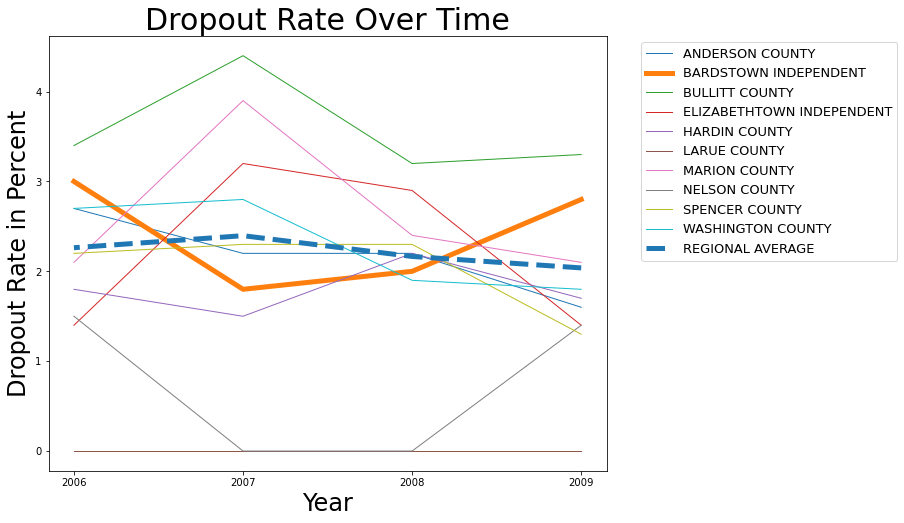

In [16]:
#increase plot size with figsize=(10,8)
fig,ax=plt.subplots(figsize=(10,8))
for agency , linewidth in zip(['ANDERSON COUNTY',
 'BARDSTOWN INDEPENDENT',
 'BULLITT COUNTY',
 'ELIZABETHTOWN INDEPENDENT',
 'HARDIN COUNTY',
 'LARUE COUNTY',
 'MARION COUNTY',
 'NELSON COUNTY',
 'SPENCER COUNTY',
 'WASHINGTON COUNTY'],
                             [1,5,1,1,1,1,1,1,1,1]):
    soc_only_grad_rate=strpk_lean[strpk_lean['Agency Name']==agency]
    soc_pivot= pd.melt(soc_only_grad_rate,id_vars=['Agency Name'], value_vars=['Total Dropout Rate in Percent - 9-12th grade 2008-09','Total Dropout Rate in Percent - 9-12th grade 2007-08','Total Dropout Rate in Percent - 9-12th grade 2006-07','Total Dropout Rate in Percent - 9-12th grade 2005-06'])
    soc_pivot['year']=soc_pivot['variable'].str.extract(r'(\d+)$').astype('int')
    soc_pivot.plot.line('year', 'value', ax=ax, label= agency, linewidth=linewidth)
;
ax.plot(b,a, linestyle= '--', label= 'REGIONAL AVERAGE', linewidth=5)  
#this allows you to dictate what spacing is on the x axis in the first group and what it says in the second
plt.xticks([6,7,8,9], [2006,2007,2008,2009]);
plt.xlabel("Year",fontsize= 24)
plt.ylabel("Dropout Rate in Percent",fontsize= 24)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize= 13)
# set chart title
plt.title("Dropout Rate Over Time",fontsize= 30)

In [17]:
def weight_avg(values, weights):
    return (weights* values).sum()/weights.sum()

In [18]:
z= []
for values,weight in zip( ['Total Current Expenditures - Instruction per Pupil 2009-10','Total Current Expenditures - Instruction per Pupil 2008-09','Total Current Expenditures - Instruction per Pupil 2007-08','Total Current Expenditures - Instruction per Pupil 2006-07','Total Current Expenditures - Instruction per Pupil 2005-06'],['Fall Membership 2009-10', 'Fall Membership 2008-09','Fall Membership 2007-08','Fall Membership 2006-07','Fall Membership 2005-06']):
    dfsub= strpk_lean[[values,weight]].dropna()
    #print(dfsub.shape)
    z.append(weight_avg(dfsub[values], dfsub[weight]))
    print (z)

[5006.755389412927]
[5006.755389412927, 4815.671256215702]
[5006.755389412927, 4815.671256215702, 4793.963188480533]
[5006.755389412927, 4815.671256215702, 4793.963188480533, 4572.168508287293]
[5006.755389412927, 4815.671256215702, 4793.963188480533, 4572.168508287293, 4316.10232141078]


In [19]:
k=[10,9,8,7,6]
k

[10, 9, 8, 7, 6]

Text(0.5, 1.0, 'Cost per Student Over Time')

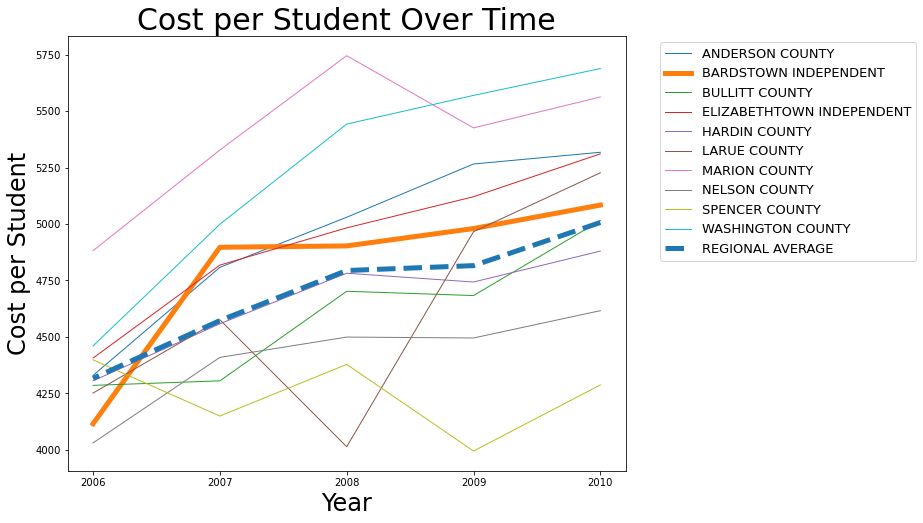

In [20]:
#increase plot size with figsize=(10,8)
fig,ax=plt.subplots(figsize=(10,8))
for agency , linewidth in zip(['ANDERSON COUNTY',
 'BARDSTOWN INDEPENDENT',
 'BULLITT COUNTY',
 'ELIZABETHTOWN INDEPENDENT',
 'HARDIN COUNTY',
 'LARUE COUNTY',
 'MARION COUNTY',
 'NELSON COUNTY',
 'SPENCER COUNTY',
 'WASHINGTON COUNTY'],
                             [1,5,1,1,1,1,1,1,1,1]):
    soc_only_grad_rate=strpk_lean[strpk_lean['Agency Name']==agency]
    soc_pivot= pd.melt(soc_only_grad_rate,id_vars=['Agency Name'], value_vars=['Total Current Expenditures - Instruction per Pupil 2009-10','Total Current Expenditures - Instruction per Pupil 2008-09','Total Current Expenditures - Instruction per Pupil 2007-08','Total Current Expenditures - Instruction per Pupil 2006-07','Total Current Expenditures - Instruction per Pupil 2005-06'])
    soc_pivot['year']=soc_pivot['variable'].str.extract(r'(\d+)$').astype('int')
    soc_pivot.plot.line('year', 'value', ax=ax, label= agency, linewidth=linewidth)
    ;
ax.plot(k,z, linestyle= '--', label= 'REGIONAL AVERAGE', linewidth=5)
#this allows you to dictate what spacing is on the x axis in the first group and what it says in the second
plt.xticks([6,7,8,9,10], [2006,2007,2008,2009,2010]);
plt.xlabel("Year",fontsize= 24)
plt.ylabel("Cost per Student",fontsize= 24)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize= 13)
# set chart title
plt.title("Cost per Student Over Time",fontsize= 30)